In [40]:
import pathlib
import numpy as np
import scipy as sp
import pickle
import pandas as pd
from matplotlib import pyplot as plt

import SessionTools.two_photon as st2p
import NeuromodPlasticity as nmp

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pkldir = '/media/mplitt/SSD_storage/2P_scratch/DTE_EL_EPG_dual_color/PreProcDat'

with open(pkldir, 'rb') as f:
    data = pickle.load(f)

In [3]:
def print_nested_keys(data, indent=0):
    """Recursively prints the keys of a nested dictionary."""
    if isinstance(data, dict):
        for key, value in data.items():
           print("  " * indent + str(key))  # Print the key with indentation 
           print_nested_keys(value, indent + 1) 

In [4]:
print_nested_keys(data)

C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00001.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00002.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00003.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00004.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00005.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
 

In [ ]:
flydirs = [k for k in data.keys()]



In [32]:
flydirs

['C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly4_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly3_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly2_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly1_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180415\\Fly1_4-5day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180416\\Fly4_3-4day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180416\\Fly3_3-4day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180416\\Fly2_3-4day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180417\\Fly1_4-5day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180417\\Fly2_4-5day_6fx

In [33]:
channel_lookup = {}
for flydir in flydirs:
    channel_lookup[flydir]={}
    if 'G60D05RSS27' in flydir:
        channel_lookup[flydir]['EPG'] = 'DF_G'
        channel_lookup[flydir]['EL'] = 'DF_R'
    else:
        channel_lookup[flydir]['EPG'] = 'DF_R'
        channel_lookup[flydir]['EL'] = 'DF_G'

        

In [ ]:
# 
trial_names = [k for k in data[flydirs[2]].keys()]

trial_dict = data[flydirs[2]][trial_names[4]]

2.567803718077138
2.56762513745734
2.5685108878447878
2.5683362732856696
2.568515120149512


/tmp/ipykernel_2029624/4196843480.py:12: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  dh = sp.ndimage.filters.gaussian_filter1d(np.concatenate([[0], dh/dt]), sigma=.2/dt.mean())


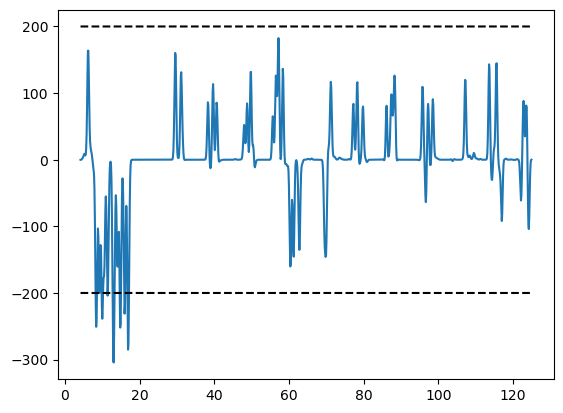

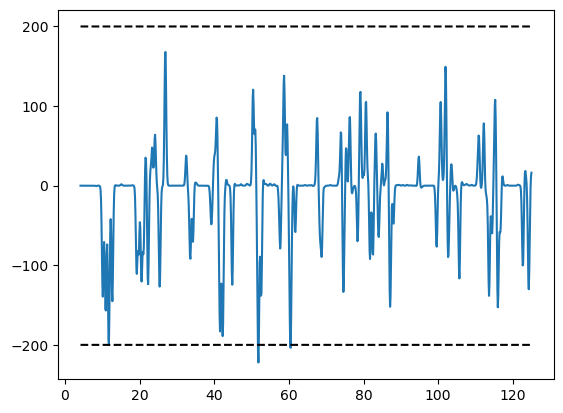

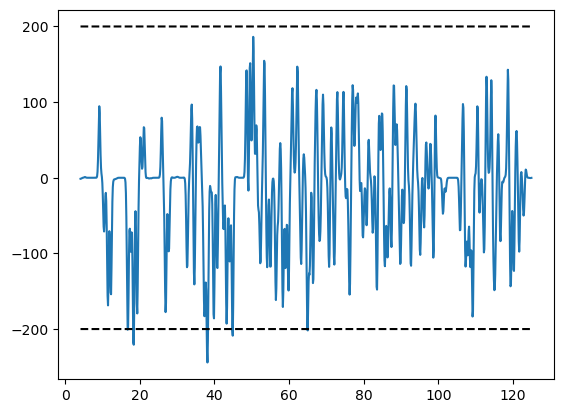

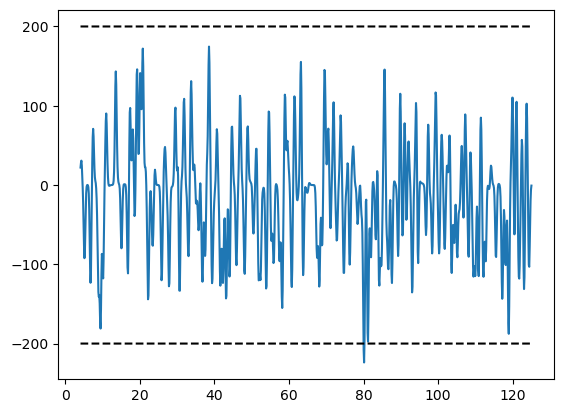

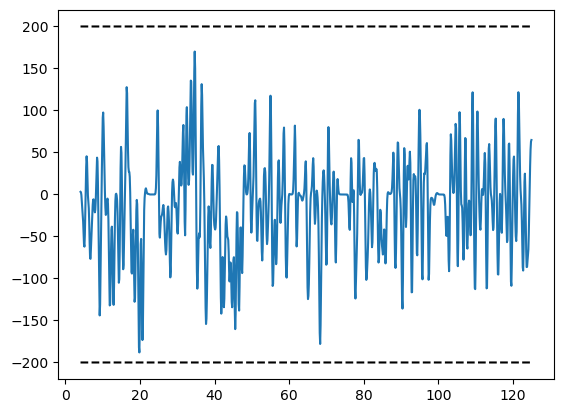

In [ ]:
f = flydirs[3]
trial_names = [k for k in data[f].keys()]
# trial_dict = data[f][trial_names[4]]
for t in range(5): 
    trial_dict = data[f][trial_names[t]]
    behav_dat = trial_dict['behavDat'].loc[trial_dict['behavDat']['closed'] ==1].copy()


    dt = np.ediff1d(behav_dat['Elapsed time'])
    print(.3/dt.mean())
    dh = np.ediff1d(behav_dat['Rotational offset'])
    dh = sp.ndimage.filters.gaussian_filter1d(np.concatenate([[0], dh/dt]), sigma=.3/dt.mean())

    fig, ax = plt.subplots()
# ax.hist(dh)
    time = behav_dat['Elapsed time'].values
    ax.plot(time, dh)
    ax.plot(time, 200*np.ones_like(time), 'k--')
    ax.plot(time, -200*np.ones_like(time), 'k--')
    # ax.plot(behav_dat['Rotational offset'])



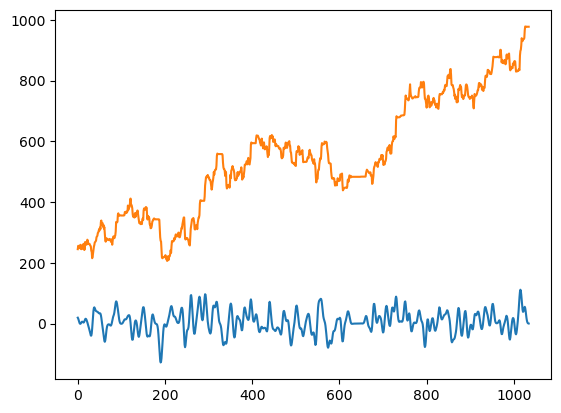

In [110]:
fig, ax = plt.subplots()
# ax.hist(dh)
ax.plot(dh)
ax.plot(behav_dat['Rotational offset'])

In [38]:
behav_dat.head()

,Elapsed time,Rotational offset,Forward offset,Lateral offset,dx0,dx1,dy0,dy1,closed,olsdir,trans,olgain,clgain
0,4.159166,317.387329,0.051193,0.011657,-151.0,-177.0,95.0,-16.0,1,0,0,0.0,1.0
1,4.275804,316.658966,0.058052,0.001946,-152.0,-178.0,96.0,-16.0,1,0,0,0.0,1.0
2,4.392400,318.083191,0.080819,-0.015714,-148.0,-176.0,97.0,-11.0,1,0,0,0.0,1.0
3,4.509132,320.315399,0.148841,-0.086440,-144.0,-176.0,105.0,0.0,1,0,0,0.0,1.0
4,4.625807,321.089783,0.210264,-0.112978,-141.0,-173.0,109.0,12.0,1,0,0,0.0,1.0


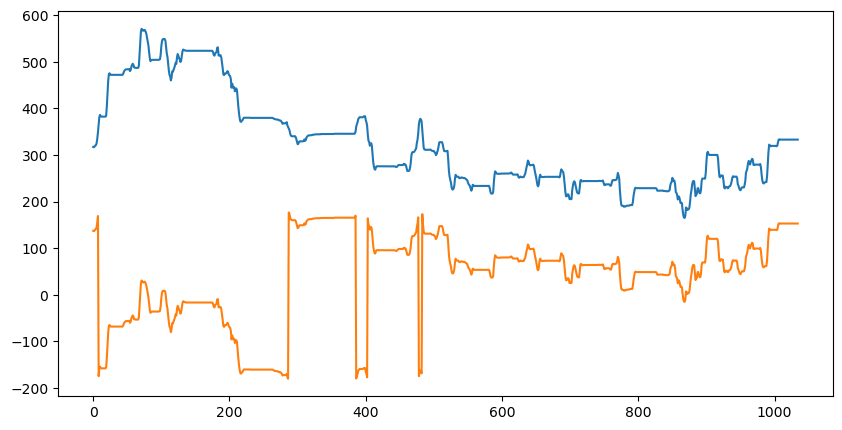

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

mask = behav_dat['closed'] ==1
ax.plot(behav_dat['Rotational offset'].loc[mask], label='Rotational offset')
ax.plot(behav_dat['Rotational offset'].loc[mask]%360-180, label='Unwrapped Rotational offset')
# ax.plot(trial_dict['behavDat']['Rotational offset'])

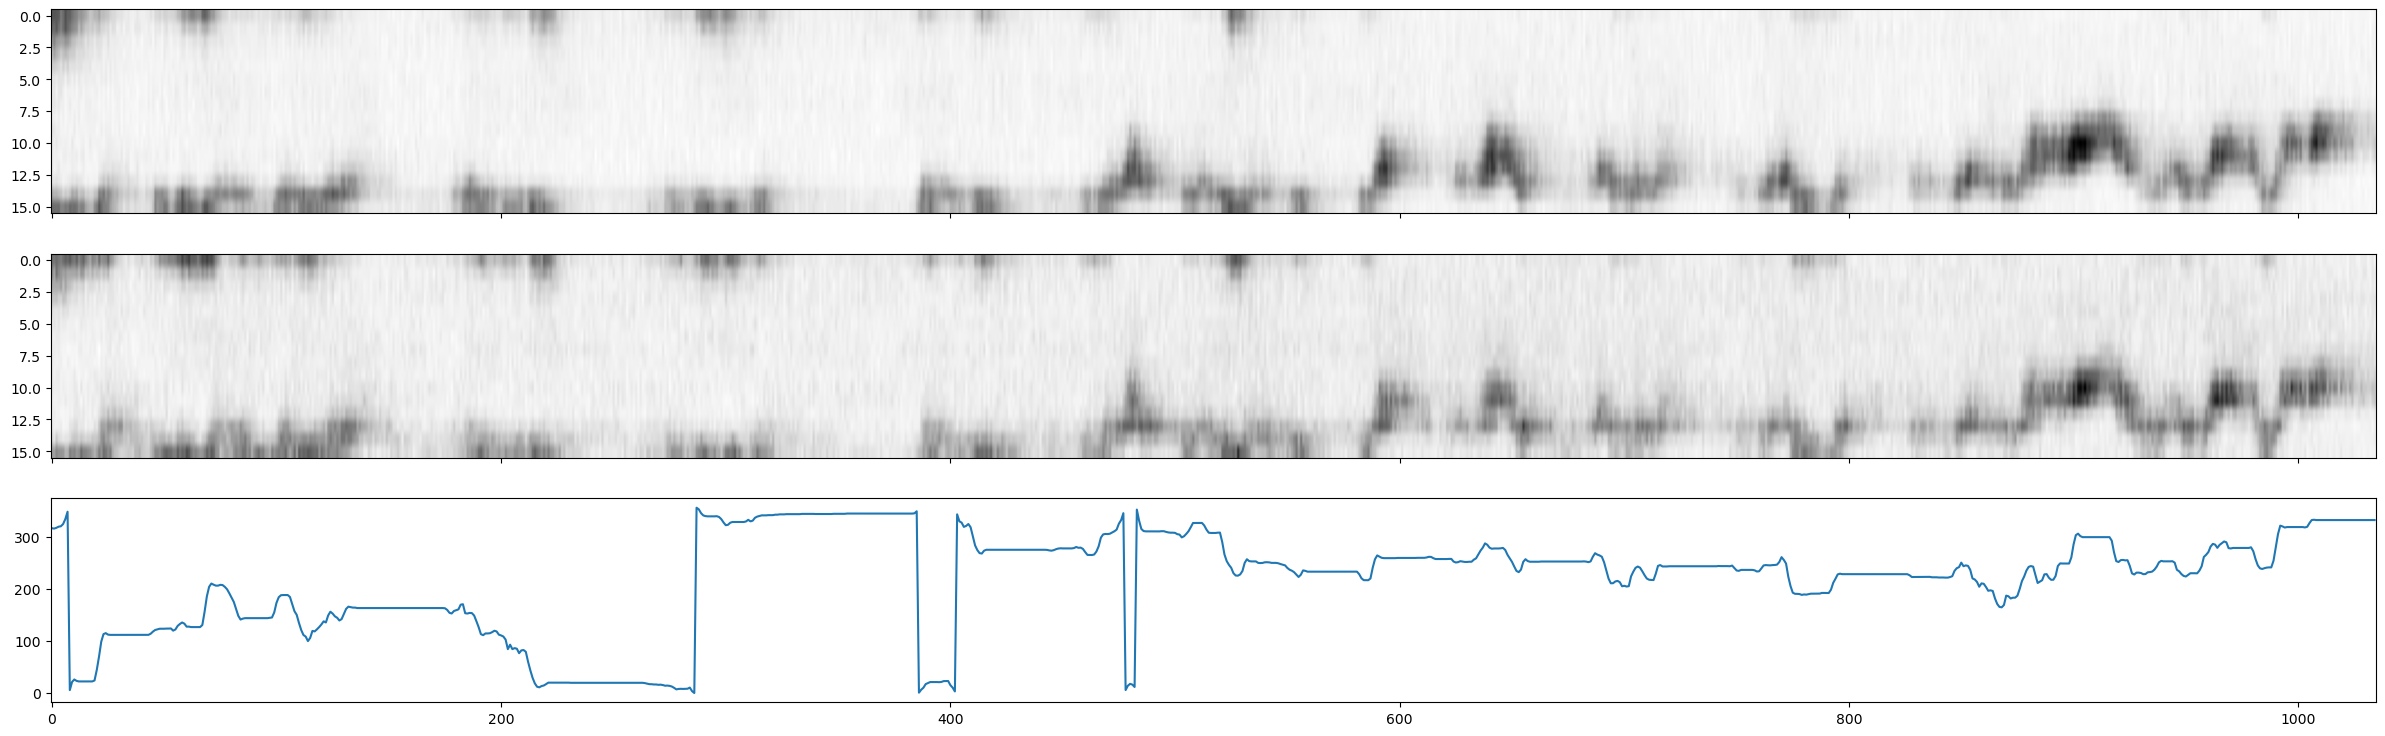

In [30]:
fig, ax = plt.subplots(3, 1, figsize=[30, 9],sharex=True)
h0 = ax[0].imshow(trial_dict['DF_G'][mask,:].T, cmap='Greys', aspect='auto')
h1 = ax[1].imshow(trial_dict['DF_R'][mask,:].T, cmap='Greys', aspect='auto')
ax[2].plot(trial_dict['behavDat']['Rotational offset'].loc[mask]%360, label='Rotational offset')

# fig.colorbar(h0, ax=ax[0])
# fig.colorbar(h1, ax=ax[1])

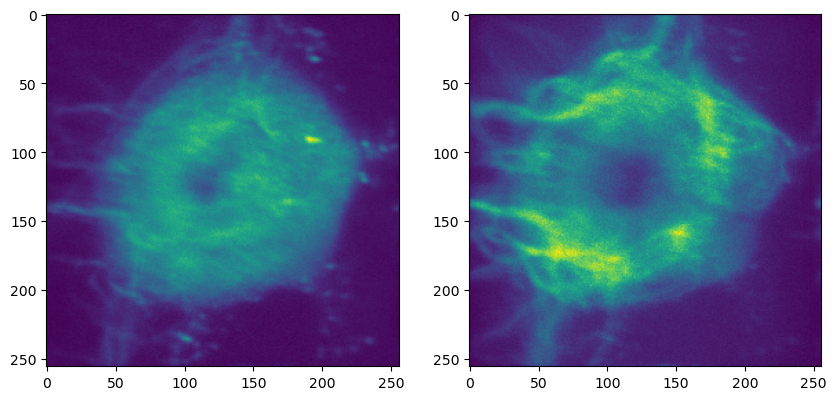

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(trial_dict['meanMIP'][0,:,:])
ax[1].imshow(trial_dict['meanMIP'][1,:,:])

In [ ]:
def shift_by_max(arr, sortby_index):

    for t in range(arr.shape[-1]):
        max_index = np.argmax(arr[sortby_index, :, t])
        arr[:, :, t] = np.roll(arr[:, :, t], -max_index+8, axis=1)
    return arr

l_turn_arr, r_turn_arr = [], []
dh_min, dh_max = 250/180*np.pi, 350/180*np.pi
for _, row in sess_df.iterrows():
    if row['closed_loop'] == 0:
        
        ts = nmp.session.GetTS(load_row(row), channels=(0,1), h_sigma=0.1, dh_sigma=0.3)

        l_turn_mask = np.logical_and(ts.dh > dh_min, ts.dh < dh_max)
        r_turn_mask = np.logical_and(ts.dh < -dh_min, ts.dh > -dh_max)

        
        

        if l_turn_mask.sum() > 0:
            l_turns = shift_by_max(ts.dff[:,:,l_turn_mask], 1).mean(axis=-1)
            l_turn_arr.append(l_turns)

        if r_turn_mask.sum() > 0:
            r_turns = shift_by_max(ts.dff[:,:,r_turn_mask], 1).mean(axis=-1)
            r_turn_arr.append(r_turns)
    
l_turn_arr = np.array(l_turn_arr)
print(l_turn_arr.shape)
lmin, lmax = np.amin(l_turn_arr, axis=-1, keepdims=True), np.amax(l_turn_arr, axis=-1, keepdims=True)
l_turn_arr = (l_turn_arr-lmin)/(lmax-lmin)
r_turn_arr = np.array(r_turn_arr)
rmin, rmax = np.amin(r_turn_arr, axis=-1, keepdims=True), np.amax(r_turn_arr, axis=-1, keepdims=True)
r_turn_arr = (r_turn_arr-rmin)/(rmax-rmin)
